[코로나(COVID)-19 현황 | 경기도 감염병관리지원단](http://www.gidcc.or.kr/%ec%bd%94%eb%a1%9c%eb%82%98covid-19-%ed%98%84%ed%99%a9/)

# 과제
* 아래 내용에 대해 자유롭게 분석과 시각화를 해주세요. 아래 내용은 예시로 데이터를 보고 분석 가능한 내용을 분석해 주시면 됩니다.
    * 확진일자별 확진자 현황 분석
    * 지역별 확진자 현황 분석
    * 성별, 연령대별 확진자 현황 분석
    * 증상/조사중 분석
    * 증상발현일과 확진일자 기간 구하기

## 01.증상발현일로부터 확진일자까지의 기간

In [ ]:
# 시각화를 위한 폰트설정
import platform
import matplotlib.pyplot as plt


system_name = platform.system()

if system_name == "Darwin" :
    font_family = "AppleGothic"
elif system_name == "Windows":
    font_family = "Malgun Gothic"
else:
    # Linux
    !apt -qq -y install fonts-nanum > /dev/null
    import matplotlib.font_manager as fm

    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = fm.FontProperties(fname=fontpath, size=9)
    fm._rebuild()
    font_family = "NanumBarunGothic"
    
# 그래프 스타일 설정
plt.style.use("ggplot")
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* 실습폴더 내 데이터셋 다운로드 위치 : https://drive.google.com/file/d/1JSWup-0AeqydY2Xf0SfjYug0wJ2HK5ry/view?usp=sharing

In [ ]:
df = pd.read_csv("data/gidcc_covid19.csv", low_memory=False)
df.shape

(35095, 16)

In [ ]:
df.tail()

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1
35090,35091,125464,M,61.0,60,2021. 5. 5.,2021. 5. 3.,NaN,고양-2935,고양덕양,NaN,불명확,NaN,NaN,NaN,NaN
35091,35092,125443,F,57.0,50,2021. 5. 5.,2021. 5. 4.,NaN,파주-1055,파주,NaN,불명확,NaN,NaN,NaN,NaN
35092,35093,신규55,M,25.0,20,2021. 5. 5.,NaN,무증상,광명-892,광명,NaN,불명확,NaN,NaN,NaN,NaN
35093,35094,125434,M,32.0,30,2021. 5. 5.,NaN,무증상,김포-1172,김포,NaN,불명확,NaN,NaN,NaN,NaN
35094,35095,125437,M,53.0,50,2021. 5. 5.,2021. 5. 2.,NaN,고양-2936,고양덕양,NaN,불명확,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35095 entries, 0 to 35094
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연번       35095 non-null  int64  
 1   확진자      35047 non-null  object 
 2   성별       35095 non-null  object 
 3   나이(만)    35094 non-null  float64
 4   연령대      35095 non-null  object 
 5   확진일자     35094 non-null  object 
 6   증상발현일    22902 non-null  object 
 7   무증상/조사중  12093 non-null  object 
 8   경기번호     35095 non-null  object 
 9   지역       35094 non-null  object 
 10  재검출      49 non-null     object 
 11  감염경로     35095 non-null  object 
 12  GRP      7463 non-null   object 
 13  구분       7462 non-null   object 
 14  구분2      1574 non-null   object 
 15  구분.1     7462 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 4.3+ MB


In [ ]:
# column별 결측치 확인
df.isnull().sum().sort_values(ascending=False)

재검출        35046
구분2        33521
구분.1       27633
구분         27633
GRP        27632
무증상/조사중    23002
증상발현일      12193
확진자           48
지역             1
확진일자           1
나이(만)          1
감염경로           0
경기번호           0
연령대            0
성별             0
연번             0
dtype: int64

#### 결측치가 많고 사용하지 않을 ['재검출', '구분2', '구분.1', '구분', 'GRP'] 은 drop

In [ ]:
df = df.drop(['재검출', 'GRP', '구분', '구분2', '구분.1'], axis=1)

In [ ]:
df.columns

Index(['연번', '확진자', '성별', '나이(만)', '연령대', '확진일자', '증상발현일', '무증상/조사중', '경기번호',
       '지역', '감염경로'],
      dtype='object')

#### "연번" column을 index로 설정

In [ ]:
len(df['연번'].unique())

35095

In [ ]:
df.shape

(35095, 11)

In [ ]:
df = df.set_index("연번")
df.shape

(35095, 10)

In [ ]:
df.head()

,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,감염경로
연번,,,,,,,,,,
1,3,M,54.0,50,2020. 1. 26.,2020. 1. 22.,NaN,고양-1,고양일산서,해외유입
2,4,M,55.0,50,2020. 1. 27.,2020. 1. 25.,NaN,평택-1,평택,해외유입
3,12,M,48.0,40,2020. 2. 1.,2020. 1. 20.,NaN,부천-1,부천,해외유입
4,14,F,40.0,40,2020. 2. 2.,2020. 1. 29.,NaN,부천-2,부천,해외유입
5,15,M,42.0,40,2020. 2. 5.,2020. 2. 1.,NaN,수원-1,수원장안,해외유입


#### 확진일자, 증상발현일 column을 datetime으로 변경

In [ ]:
df["확진일자_dt"] = pd.to_datetime(df['확진일자'])
df["증상발현일_dt"] = pd.to_datetime(df['증상발현일'])

df.head()

,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,감염경로,확진일자_dt,증상발현일_dt
연번,,,,,,,,,,,,
1,3,M,54.0,50,2020. 1. 26.,2020. 1. 22.,NaN,고양-1,고양일산서,해외유입,2020-01-26,2020-01-22
2,4,M,55.0,50,2020. 1. 27.,2020. 1. 25.,NaN,평택-1,평택,해외유입,2020-01-27,2020-01-25
3,12,M,48.0,40,2020. 2. 1.,2020. 1. 20.,NaN,부천-1,부천,해외유입,2020-02-01,2020-01-20
4,14,F,40.0,40,2020. 2. 2.,2020. 1. 29.,NaN,부천-2,부천,해외유입,2020-02-02,2020-01-29
5,15,M,42.0,40,2020. 2. 5.,2020. 2. 1.,NaN,수원-1,수원장안,해외유입,2020-02-05,2020-02-01


#### 증상발현일로부터 확진일자까지의 기간

In [ ]:
df['date_diff'] = df['확진일자_dt'] - df['증상발현일_dt']
df.head()

,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,감염경로,확진일자_dt,증상발현일_dt,date_diff
연번,,,,,,,,,,,,,
1,3,M,54.0,50,2020. 1. 26.,2020. 1. 22.,NaN,고양-1,고양일산서,해외유입,2020-01-26,2020-01-22,4 days
2,4,M,55.0,50,2020. 1. 27.,2020. 1. 25.,NaN,평택-1,평택,해외유입,2020-01-27,2020-01-25,2 days
3,12,M,48.0,40,2020. 2. 1.,2020. 1. 20.,NaN,부천-1,부천,해외유입,2020-02-01,2020-01-20,12 days
4,14,F,40.0,40,2020. 2. 2.,2020. 1. 29.,NaN,부천-2,부천,해외유입,2020-02-02,2020-01-29,4 days
5,15,M,42.0,40,2020. 2. 5.,2020. 2. 1.,NaN,수원-1,수원장안,해외유입,2020-02-05,2020-02-01,4 days


In [ ]:
df['date_diff_num'] = df['date_diff'].astype('str').str.split('days').str[0]
# df['date_diff_num'] = df['date_diff_num'].astype('int')
df.head()

,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,감염경로,확진일자_dt,증상발현일_dt,date_diff,date_diff_num
연번,,,,,,,,,,,,,,
1,3,M,54.0,50,2020. 1. 26.,2020. 1. 22.,NaN,고양-1,고양일산서,해외유입,2020-01-26,2020-01-22,4 days,4
2,4,M,55.0,50,2020. 1. 27.,2020. 1. 25.,NaN,평택-1,평택,해외유입,2020-01-27,2020-01-25,2 days,2
3,12,M,48.0,40,2020. 2. 1.,2020. 1. 20.,NaN,부천-1,부천,해외유입,2020-02-01,2020-01-20,12 days,12
4,14,F,40.0,40,2020. 2. 2.,2020. 1. 29.,NaN,부천-2,부천,해외유입,2020-02-02,2020-01-29,4 days,4
5,15,M,42.0,40,2020. 2. 5.,2020. 2. 1.,NaN,수원-1,수원장안,해외유입,2020-02-05,2020-02-01,4 days,4


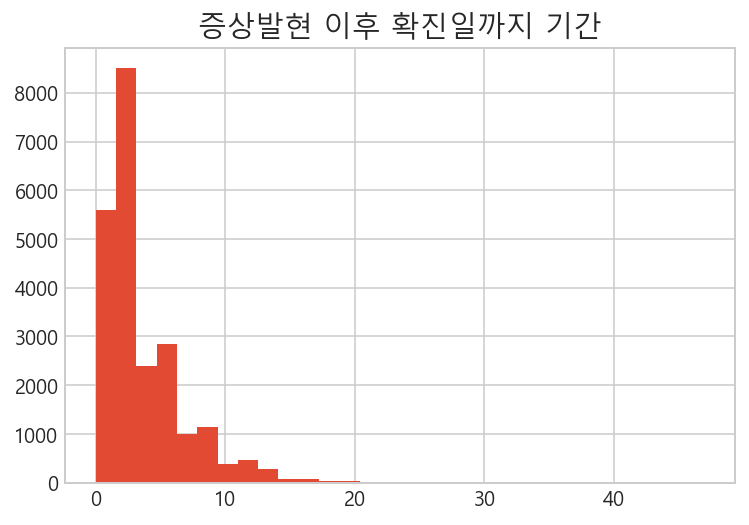

In [ ]:
df_new = df[(df['date_diff_num'] != 'NaT')].copy() # 증상이 발현되지 않은 환자 제외
df_new['date_diff_num'] = df_new['date_diff_num'].astype('int')
df_new = df_new[df_new['date_diff_num'] >= 0] # 확진 이후에 증상발현된 환자 제외

# style, font 설정
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')

g = df_new['date_diff_num'].hist(bins=30)
g.set_title('증상발현 이후 확진일까지 기간')
plt.show()

In [ ]:
# 10일 이내로 확진받는 환자 비율
df_new[df_new['date_diff_num'] <= 10].shape[0] / df_new.shape[0] * 100

95.41444667656563

#### 증상이 발현하고 대부분 10일 이내에 확진되는 것으로 보입니다

## 02.무증상/증상에 따른 환자의 성별, 나이 차이

In [ ]:
df_new = df[df['무증상/조사중'] != '확인불가'].copy()
df_new['무증상/조사중'] = df_new['무증상/조사중'].fillna('증상')
df_new.head()

,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,감염경로,확진일자_dt,증상발현일_dt,date_diff,date_diff_num
연번,,,,,,,,,,,,,,
1,3,M,54.0,50,2020. 1. 26.,2020. 1. 22.,증상,고양-1,고양일산서,해외유입,2020-01-26,2020-01-22,4 days,4
2,4,M,55.0,50,2020. 1. 27.,2020. 1. 25.,증상,평택-1,평택,해외유입,2020-01-27,2020-01-25,2 days,2
3,12,M,48.0,40,2020. 2. 1.,2020. 1. 20.,증상,부천-1,부천,해외유입,2020-02-01,2020-01-20,12 days,12
4,14,F,40.0,40,2020. 2. 2.,2020. 1. 29.,증상,부천-2,부천,해외유입,2020-02-02,2020-01-29,4 days,4
5,15,M,42.0,40,2020. 2. 5.,2020. 2. 1.,증상,수원-1,수원장안,해외유입,2020-02-05,2020-02-01,4 days,4


In [ ]:
pd.crosstab(df_new['성별'], df_new['무증상/조사중'])

무증상/조사중,무증상,증상
성별,,
F,5472,11809
M,6538,11193


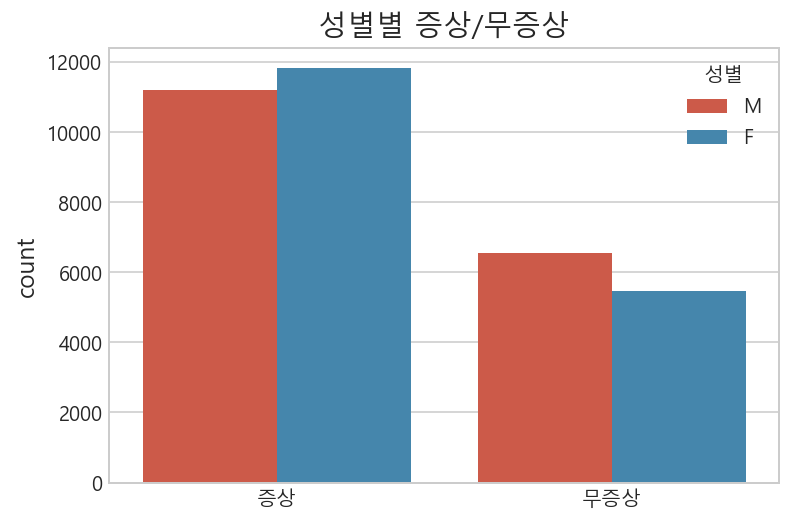

In [ ]:
g = sns.countplot('무증상/조사중', data=df_new, hue='성별')
g.set_title('성별별 증상/무증상')
g.set(xlabel='')
plt.show()

#### 증상이 있던 환자는 여성이 더 많고, 증상이 없는 환자는 남성이 더 많습니다.

In [ ]:
df_new.tail()

,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,감염경로,확진일자_dt,증상발현일_dt,date_diff,date_diff_num
연번,,,,,,,,,,,,,,
35091,125464,M,61.0,60,2021. 5. 5.,2021. 5. 3.,증상,고양-2935,고양덕양,불명확,2021-05-05,2021-05-03,2 days,2
35092,125443,F,57.0,50,2021. 5. 5.,2021. 5. 4.,증상,파주-1055,파주,불명확,2021-05-05,2021-05-04,1 days,1
35093,신규55,M,25.0,20,2021. 5. 5.,NaN,무증상,광명-892,광명,불명확,2021-05-05,NaT,NaT,NaT
35094,125434,M,32.0,30,2021. 5. 5.,NaN,무증상,김포-1172,김포,불명확,2021-05-05,NaT,NaT,NaT
35095,125437,M,53.0,50,2021. 5. 5.,2021. 5. 2.,증상,고양-2936,고양덕양,불명확,2021-05-05,2021-05-02,3 days,3


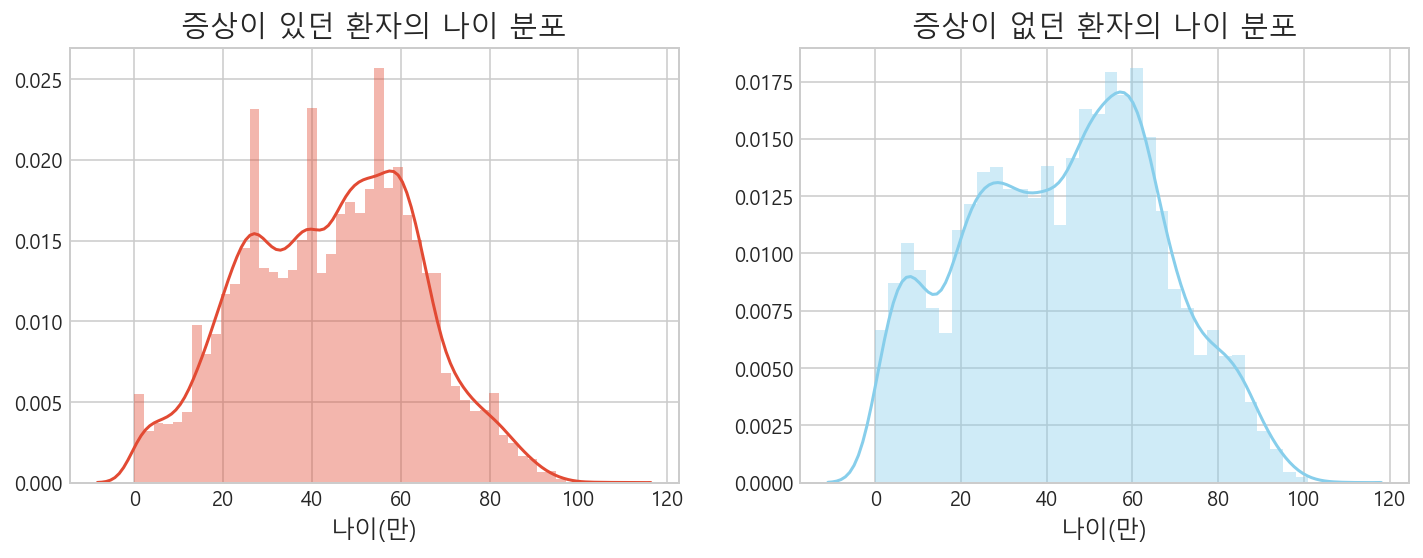

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
sns.distplot(df_new.loc[df_new['무증상/조사중'] == '증상', '나이(만)'], ax=ax1)
sns.distplot(df_new.loc[df_new['무증상/조사중'] == '무증상', '나이(만)'], color='skyblue', ax=ax2)
ax1.set_title('증상이 있던 환자의 나이 분포'); ax2.set_title('증상이 없던 환자의 나이 분포')
plt.show()

In [ ]:
df_new['연령대'].value_counts()

50     6406
40     5431
60     5046
20     4953
30     4920
10     2597
70     2180
0      1938
80     1263
90      264
100      12
조사중       2
Name: 연령대, dtype: int64

연령대가 조사중 2명은 제외하겠습니다

In [ ]:
# 연령대가 "조사중"인 행 drop
df_new = df_new.drop(df_new[df_new['연령대'] == '조사중'].index)

In [ ]:
cross_temp = pd.crosstab(df_new['연령대'], df_new['무증상/조사중'], normalize='columns')
cross_temp.index = cross_temp.index.astype('int') # index 데이터 타입 변경
cross_temp.sort_index() * 100

무증상/조사중,무증상,증상
연령대,,
0,8.726062,3.869565
10,7.926728,7.152174
20,12.980849,14.756522
30,12.497918,14.865217
40,13.746878,16.434783
50,16.686095,19.139130
60,14.096586,14.578261
70,7.069109,5.786957
80,4.937552,2.913043


In [ ]:
# 증상/무증상의 연령대 분포의 누적
cross_temp.sort_index().cumsum() * 100

무증상/조사중,무증상,증상
연령대,,
0,8.726062,3.869565
10,16.652789,11.021739
20,29.633639,25.778261
30,42.131557,40.643478
40,55.878435,57.078261
50,72.564530,76.217391
60,86.661116,90.795652
70,93.730225,96.582609
80,98.667777,99.495652


#### 증상/무증상 환자의 나이 분포 차이는 다음과 같습니다.
* 무증상인 환자 중에는 10대의 비율이 증상이 있던 환자에 비해 더 많습니다.
* 증상이 있던 환자 중에는 40대, 50대 비율이 무증상이었던 환자에 비해 더 많습니다.

## 03.확진일자별 확진자 현황 분석

In [ ]:
day_count = df['확진일자_dt'].value_counts().sort_index()
day_count

2020-01-26      1
2020-01-27      1
2020-02-01      1
2020-02-02      1
2020-02-05      2
             ... 
2021-05-01    149
2021-05-02    126
2021-05-03    122
2021-05-04    167
2021-05-05    140
Name: 확진일자_dt, Length: 445, dtype: int64

In [ ]:
start_day = df['확진일자_dt'].iloc[0]
end_day = df['확진일자_dt'].iloc[-1]

In [ ]:
all_day = pd.date_range(start_day, end_day).to_frame()
all_day

,0
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
2020-01-29,2020-01-29
2020-01-30,2020-01-30
...,...
2021-05-01,2021-05-01
2021-05-02,2021-05-02
2021-05-03,2021-05-03
2021-05-04,2021-05-04


In [ ]:
all_day['확진수'] = day_count
all_day['확진수'] = all_day['확진수'].fillna(0).astype('int')
all_day

,0,확진수
2020-01-26,2020-01-26,1
2020-01-27,2020-01-27,1
2020-01-28,2020-01-28,0
2020-01-29,2020-01-29,0
2020-01-30,2020-01-30,0
...,...,...
2021-05-01,2021-05-01,149
2021-05-02,2021-05-02,126
2021-05-03,2021-05-03,122
2021-05-04,2021-05-04,167


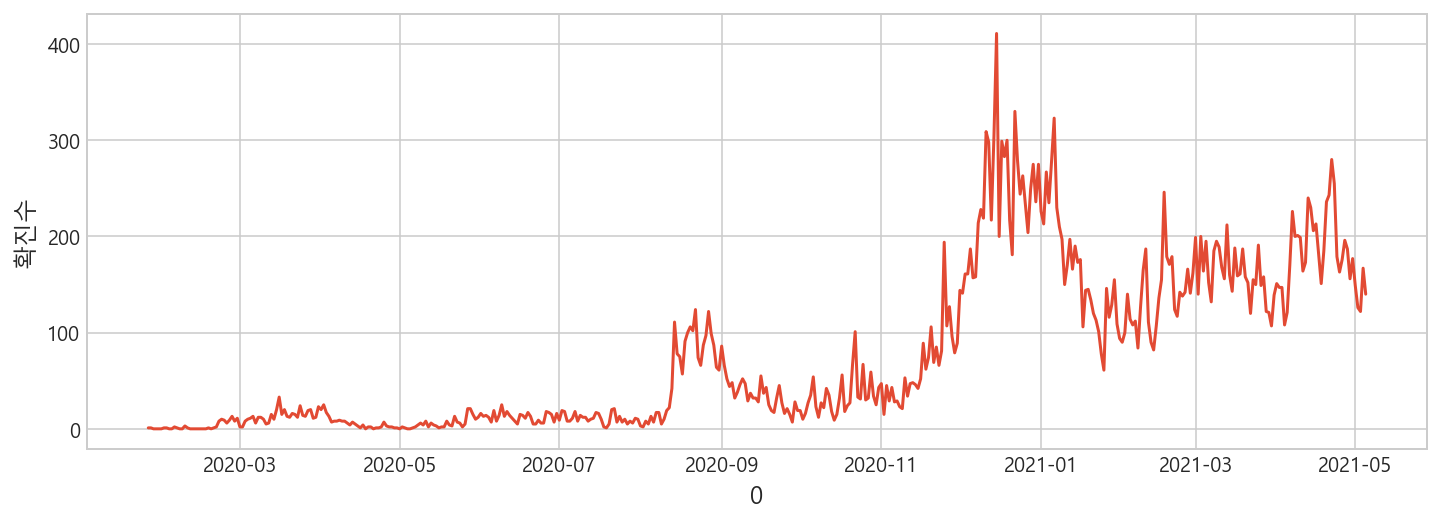

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(x=0, y='확진수', data=all_day)
plt.show()

* **꾸준히 증가하다가 2021년 01월부터 감소하다가 2월에 다소 증가하였음**
* **2020년 8월에 급격히 증가**

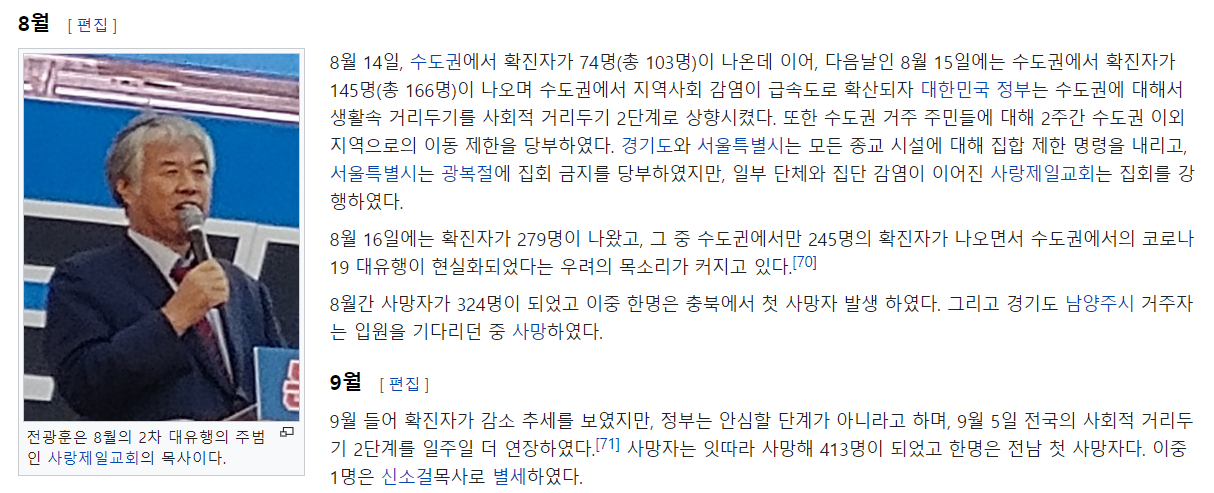

In [ ]:
from IPython.display import Image

Image("C:/Users/SAMSUNG/Desktop/제목 없음.png")

#### 8월에는 사랑제일교회 집회로 인한 수도권 범유행이 시작되었음

## 04.지역별 확진자 현황 분석

In [ ]:
df.head()

,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,감염경로,확진일자_dt,증상발현일_dt,date_diff,date_diff_num
연번,,,,,,,,,,,,,,
1,3,M,54.0,50,2020. 1. 26.,2020. 1. 22.,NaN,고양-1,고양일산서,해외유입,2020-01-26,2020-01-22,4 days,4
2,4,M,55.0,50,2020. 1. 27.,2020. 1. 25.,NaN,평택-1,평택,해외유입,2020-01-27,2020-01-25,2 days,2
3,12,M,48.0,40,2020. 2. 1.,2020. 1. 20.,NaN,부천-1,부천,해외유입,2020-02-01,2020-01-20,12 days,12
4,14,F,40.0,40,2020. 2. 2.,2020. 1. 29.,NaN,부천-2,부천,해외유입,2020-02-02,2020-01-29,4 days,4
5,15,M,42.0,40,2020. 2. 5.,2020. 2. 1.,NaN,수원-1,수원장안,해외유입,2020-02-05,2020-02-01,4 days,4


In [ ]:
start = df[df['확진일자'] == '2020. 8. 1.'].index[0]
end = df[df['확진일자'] == '2020. 9. 30.'].index[0]

In [ ]:
new_df = df.iloc[start:end]
new_df.head()

,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,감염경로,확진일자_dt,증상발현일_dt,date_diff,date_diff_num
연번,,,,,,,,,,,,,,
1560,14408,M,19.0,10,2020. 8. 1.,NaN,무증상,평택-154,평택,해외유입,2020-08-01,NaT,NaT,NaT
1561,14409,F,20.0,20,2020. 8. 1.,2020. 7. 23.,NaN,평택-155,평택,해외유입,2020-08-01,2020-07-23,9 days,9
1562,14384,F,1.0,0,2020. 8. 2.,2020. 7. 31.,NaN,용인-126,용인기흥,불명확,2020-08-02,2020-07-31,2 days,2
1563,14405,M,38.0,30,2020. 8. 2.,NaN,무증상,평택-156,평택,해외유입,2020-08-02,NaT,NaT,NaT
1564,14397,F,5.0,0,2020. 8. 3.,2020. 8. 2.,NaN,성남-189,성남분당,불명확,2020-08-03,2020-08-02,1 days,1


In [ ]:
new_df['지역'].value_counts()

부천       167
평택       145
고양일산동    128
용인기흥     126
고양덕양     125
김포       104
시흥       102
파주        97
의정부       96
성남분당      94
양평        91
화성        89
광명        88
군포        88
남양주풍양     87
성남수정      81
용인수지      79
안양동안      76
안산단원      67
고양일산서     64
남양주       62
안산상록      57
구리        57
안양만안      50
하남        48
수원영통      47
성남중원      44
광주        43
가평        43
이천        43
수원권선      40
수원팔달      40
용인처인      36
수원장안      36
양주        33
포천        32
오산        22
안성        19
연천        16
여주        13
의왕        12
과천        12
평택송탄      12
동두천       10
평택안중       5
Name: 지역, dtype: int64

#### 8월~9월 사이 제일 확진자가 많은 5개의 경기도 지역은 아래와 같음

In [ ]:
loc_df = new_df['지역'].value_counts()[:5].to_frame()
loc_df

,지역
부천,167
평택,145
고양일산동,128
용인기흥,126
고양덕양,125


부천시 위경도 = 37.44, 126.766  
평택 위경도 = 36.99210, 127.112945   
고양일산 위경도 =	37.64862 / 126.75884   
용인 위경도 = 37.2410864, 127.1775537   
고양덕양 위경도 = 37.629994, 126.85997  

In [ ]:
lat_long_df = pd.DataFrame({'위도':[37.44, 36.99210, 37.64862, 37.241086, 37.629994], 
             '경도':[126.766, 127.112945, 126.75884, 127.1775537, 126.85997]})
lat_long_df.index = ['부천', '평택', '고양일산동', '용인기흥', '고양덕양']
lat_long_df

,위도,경도
부천,37.440000,126.766000
평택,36.992100,127.112945
고양일산동,37.648620,126.758840
용인기흥,37.241086,127.177554
고양덕양,37.629994,126.859970


In [ ]:
geo_df = pd.concat([loc_df, lat_long_df], axis=1)
geo_df

,지역,위도,경도
부천,167,37.440000,126.766000
평택,145,36.992100,127.112945
고양일산동,128,37.648620,126.758840
용인기흥,126,37.241086,127.177554
고양덕양,125,37.629994,126.859970


In [ ]:
import folium

map = folium.Map(location=[geo_df["위도"].mean(),geo_df["경도"].mean()])
map

In [ ]:
for n in geo_df.index:
    name = geo_df.index
    popup = f"{name}"
    location = [geo_df.loc[n, "위도"], geo_df.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map

#### 8월~9월 사이 경기도의 최다 확진자 지역은 어느정도 가까운 거리인 것으로 보임